In [260]:
%pylab inline
%matplotlib inline

# scatters points in 2xn matrix
def scatter_matrix(matrix, **kargs):
    if matrix.shape[0] != 2:
        raise ValueError('Input matrix needs 2xn shape')
    scatter(array(matrix[0,:]),array(matrix[1,:]),**kargs)
    
# plots connection between points in two 2xn matrices
def plot_connection(a,b, *args, **kargs):
    if a.shape[0] != 2:
        raise ValueError('Input matrix needs 2xn shape')
    if a.shape != b.shape:
        raise ValueError('Input matrices need the same shape of 2xn')
    for i in range(a.shape[1]):
        plot(array([a[0,i],b[0,i]]),array([a[1,i],b[1,i]]),*args,**kargs)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [266]:
# generate data
count = 100
d_r = rand(2,count)

noise_mu = 0
noise_sigma = 10
noise = noise_sigma * randn(2,count) + noise_mu

frm_in = matrix('300,0;0,200')
frm_out= matrix('200,0;0,300')

d_in = dot(frm_in,d_r)
d_oo = dot(frm_out,d_r)
d_out= dot(frm_out,d_r) + noise

In [267]:
# regression

order = 2 # includes static bias

dm_x = np.zeros((order,count))
dm_y = np.zeros((order,count))
for o in range(order):
    dm_x[o,:] = power(d_in[0,:],o)
    dm_y[o,:] = power(d_in[1,:],o)
    
dm_x_sq = dot(dm_x,transpose(dm_x))
dm_y_sq = dot(dm_y,transpose(dm_y))

dm_x_inv = inv(dm_x_sq)
dm_y_inv = inv(dm_y_sq)

# predicted weights
w_x = dot(dot(dm_x_inv,dm_x),transpose(d_out[0,:]))
w_y = dot(dot(dm_y_inv,dm_y),transpose(d_out[1,:]))

pred = matrix(zeros((2,count)))
for o in range(order):
    pred[0,:] += dot(w_x[o], power( d_in[0,:], o))
    pred[1,:] += dot(w_y[o], power( d_in[1,:], o))

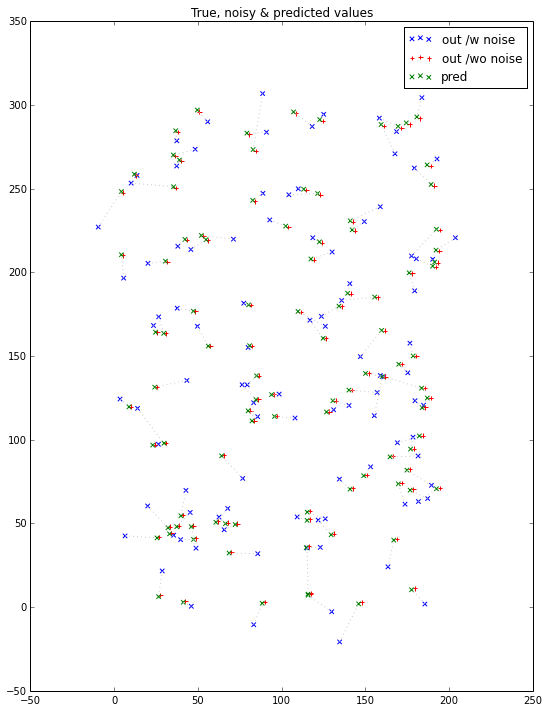

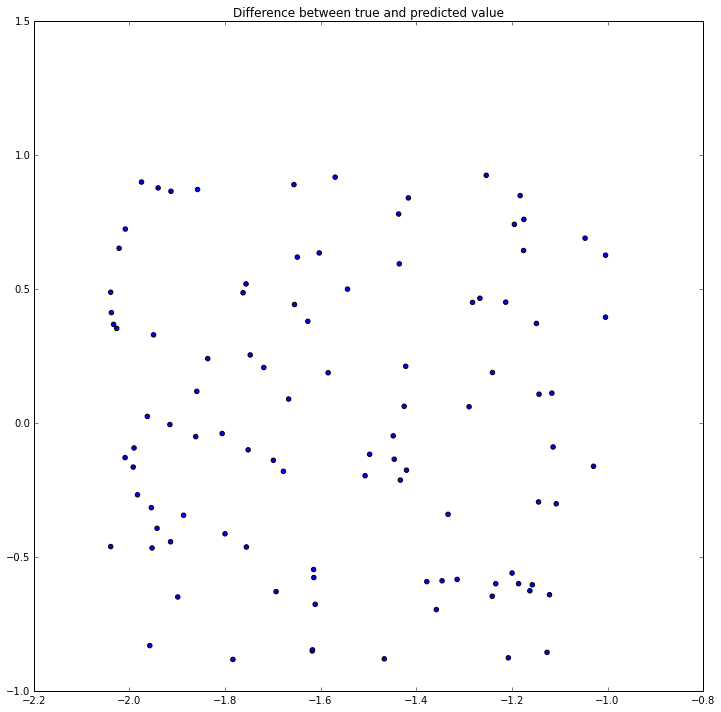

In [270]:
# visualization

fsize = 12
figure(figsize=(fsize,fsize))

#scatter_matrix(d_in, c='y',marker='x',label='in')
scatter_matrix(d_out, c='b',marker='x',label='out /w noise')
scatter_matrix(d_oo, c='r',marker='+',label='out /wo noise')
scatter_matrix(pred, c='g',marker='x',label='pred')

#plot_connection(d_in,d_out,':' ,c='#CCCCCC')
plot_connection(d_out,pred,':',c='#CCCCCC')

axes().set_aspect('equal')
legend(loc=0)
title('True, noisy & predicted values')

figure(figsize=(fsize,fsize))
diff = array(pred-d_oo)
scatter(diff[0,:],diff[1,:])
title('Difference between true and predicted value')

In [258]:
err

matrix([[ 497.61426864],
        [ 422.28168029]])